Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 26, 26, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 507)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,110 (19.96 KB)

 Trainable params: 5,110 (19.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9016 - loss: 0.3371 - val_accuracy: 0.9390 - val_loss: 0.2077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9347 - loss: 0.2295 - val_accuracy: 0.9307 - val_loss: 0.2378
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9379 - loss: 0.2191 - val_accuracy: 0.9348 - val_loss: 0.2221
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9381 - loss: 0.2205 - val_accuracy: 0.9400 - val_loss: 0.2091
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9383 - loss: 0.2243 - val_accuracy: 0.9393 - val_loss: 0.2208
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9406 - loss: 0.2088 - val_accuracy: 0.9390 - val_loss: 0.2216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9388 - loss: 0.2151 - val_accuracy: 0.9313 - val_loss: 0.2322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9392 - loss: 0

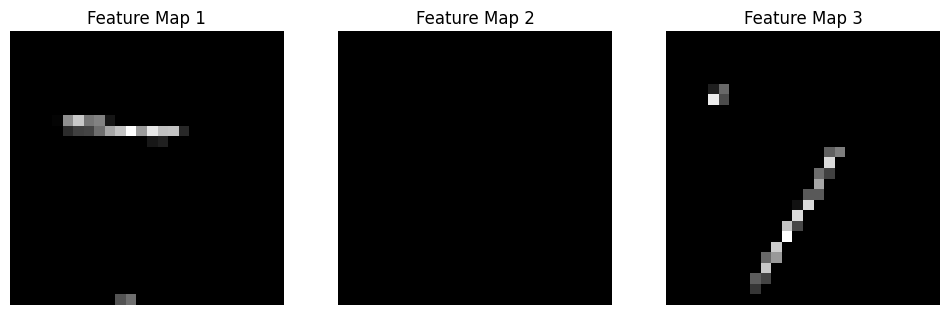

Initial training accuracy: 0.9238


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=3, kernel_size=(3, 3), activation="relu", name="conv1")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
conv_layer = model.get_layer("conv1")
feature_extractor = keras.Model(inputs=model.input, outputs=conv_layer.output)
sample_image = np.expand_dims(X_test[0], axis=0)
feature_maps = feature_extractor.predict(sample_image)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(feature_maps[0, :, :, i], cmap="gray")
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis("off")

plt.show()
initial_accuracy = history.history["accuracy"][0]
print(f"Initial training accuracy: {initial_accuracy:.4f}")